# Jia Zeng 8936740 - Assignment 2
---

In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import zscore

Consider the heart disease dataset in pandas dataframe

In [188]:
df = pd.read_csv("./CSVs/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [189]:
# check data there's any null
print(f'Its there and NA: {df.isna().values.any()}')
print(f'Its there and Null: {df.isnull().values.any()}')

Its there and NA: False
Its there and Null: False


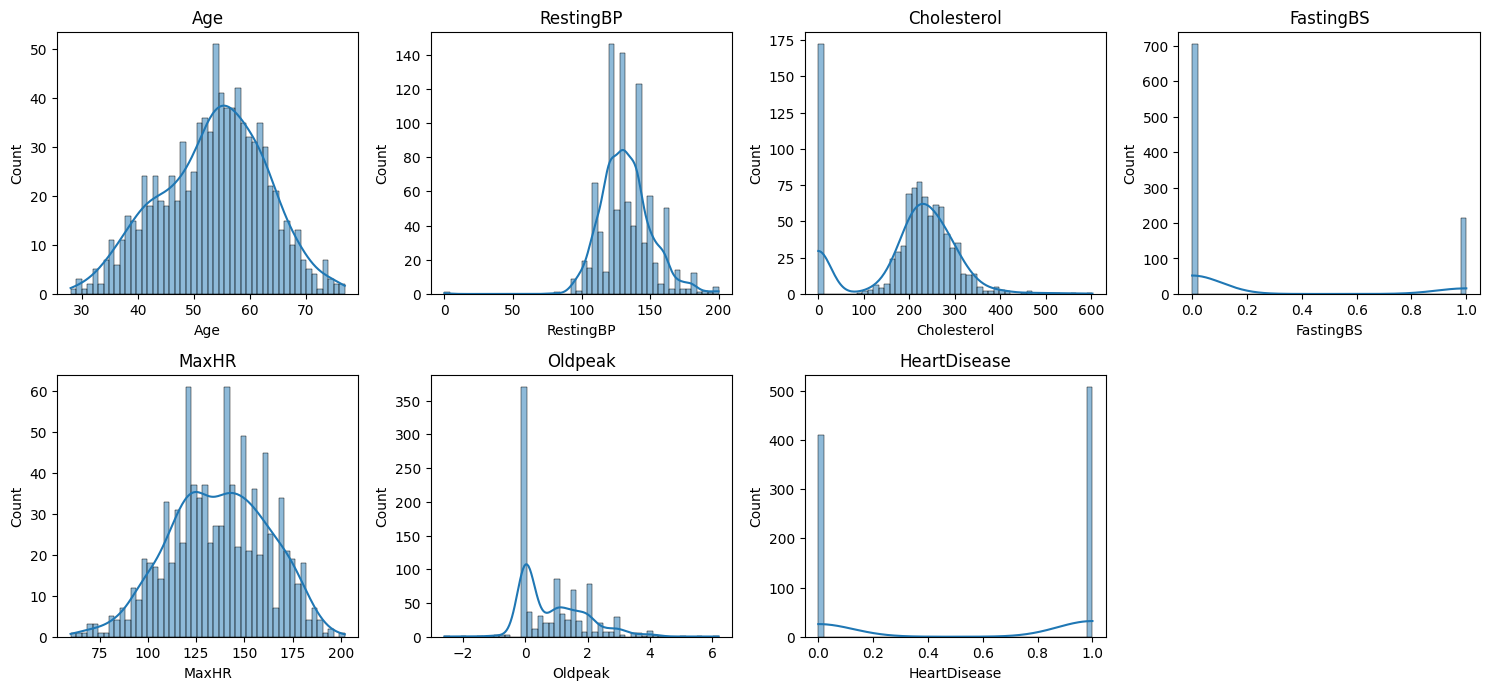

In [190]:
plt.figure(figsize=(15, 10))  # Adjust the size of the whole figure accordingly

df_numeric = df.select_dtypes(include=['float64', 'int64']) # only print numeric
for i, column in enumerate(df_numeric.columns):
    plt.subplot(3, 4, i + 1)
    sn.histplot(df[column], bins=50, kde=True)
    plt.title(column)

plt.tight_layout() 

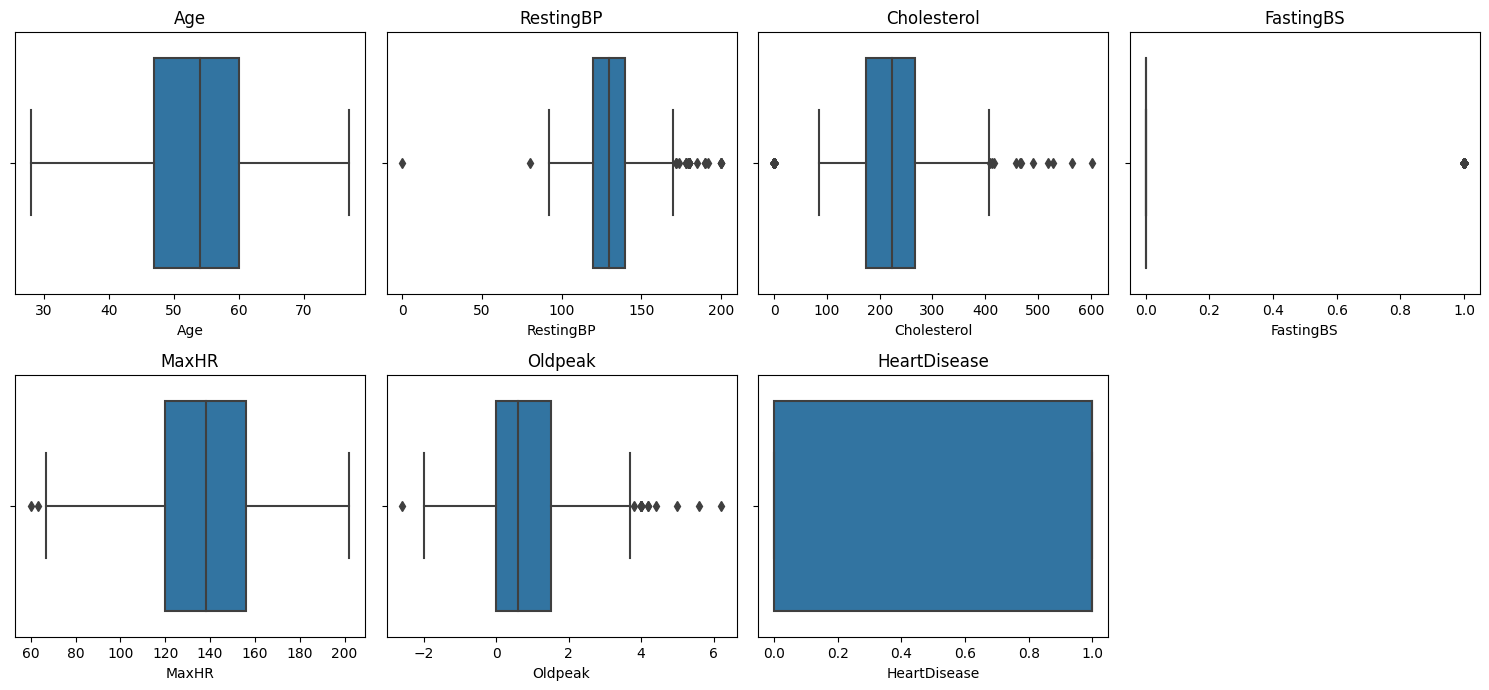

In [191]:
plt.figure(figsize=(15, 10))  # Adjust the size of the whole figure accordingly

df_numeric = df.select_dtypes(include=['float64', 'int64']) # only print numeric
for i, column in enumerate(df_numeric.columns):
    plt.subplot(3, 4, i + 1)
    sn.boxplot(x = df_numeric[column])
    plt.title(column)

plt.tight_layout() 

Remove outliers using mean,median,Z score<br>
Only RestingBP(z-score), Cholesterol(median), MaxHR(mean), Oldpeak(median) need change outliers.

In [192]:
df['RestingBP_Zscore'] = np.abs(stats.zscore(df['RestingBP']))

# Remove outliers
df = df[df['RestingBP_Zscore'] < 3]

# Drop the Z-score column
df = df.drop(columns=['RestingBP_Zscore'])

In [193]:
# Find IQR
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Remove the outliers
df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

In [194]:
# Calculate the mean and standard deviation
mean = df['MaxHR'].mean()
std_dev = df['MaxHR'].std()

# Define the boundaries
lower_bound = mean - 3*std_dev
upper_bound = mean + 3*std_dev

# Remove the outliers
df = df[(df['MaxHR'] >= lower_bound) & (df['MaxHR'] <= upper_bound)]

In [195]:
# Calculate IQR
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df = df[(df['Oldpeak'] >= lower_bound) & (df['Oldpeak'] <= upper_bound)]

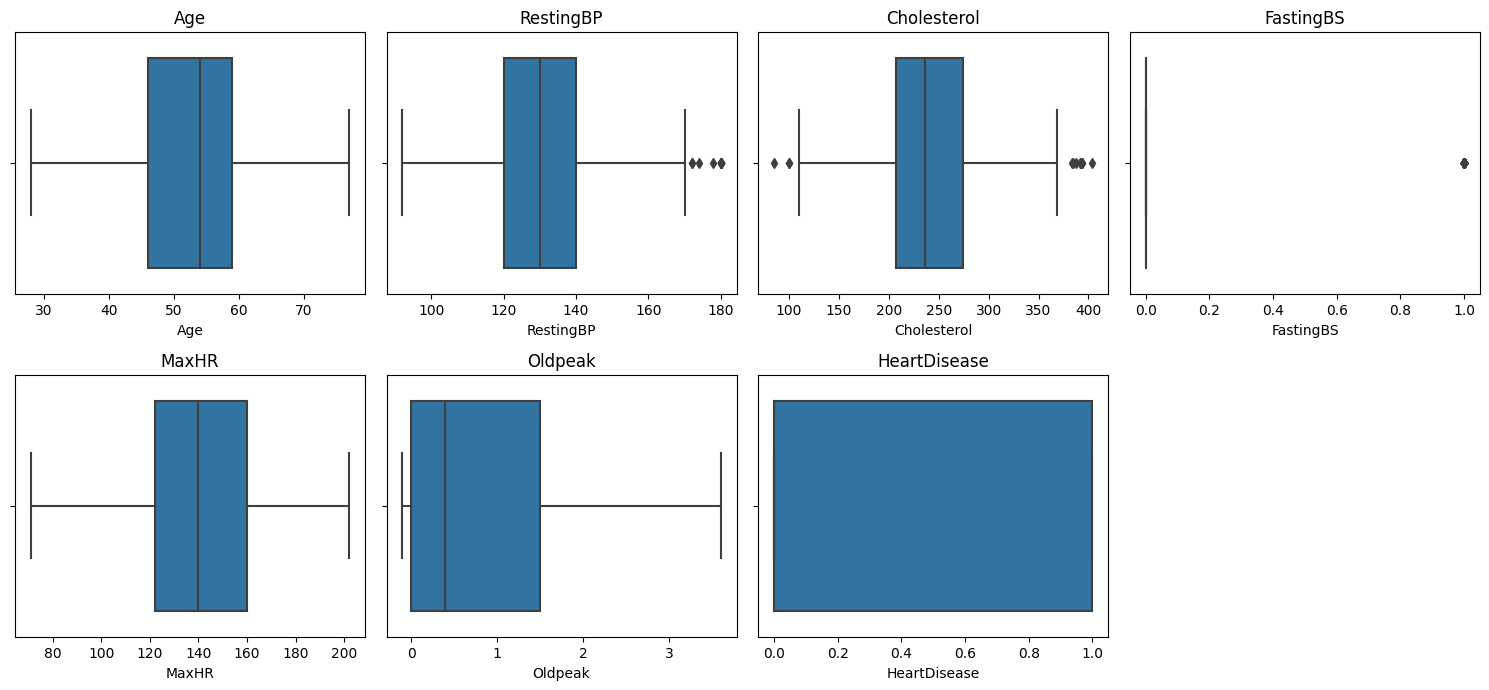

In [196]:
plt.figure(figsize=(15, 10))  # Adjust the size of the whole figure accordingly

df_numeric = df.select_dtypes(include=['float64', 'int64']) # only print numeric
for i, column in enumerate(df_numeric.columns):
    plt.subplot(3, 4, i + 1)
    sn.boxplot(x = df_numeric[column])
    plt.title(column)

plt.tight_layout() 

Convert text columns to numbers using label encoding and one hot encoding

In [197]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [198]:
objects = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoder = LabelEncoder()
for c in objects:
    df[c] = label_encoder.fit_transform(df[c])

In [199]:
print(df.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


Apply scaling

In [200]:
from sklearn.preprocessing import StandardScaler

X = df.drop('HeartDisease', axis = 1) # get except HeartDisease
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance

In [201]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f'SVM Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

SVM Accuracy: 72.09%


In [202]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=svm.SVC(), n_estimators=10, random_state=0)
bagging_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the model
print(f'Bagging SVM Accuracy: {round(accuracy_score(y_test, y_pred_bagging) * 100, 2)}%')

Bagging SVM Accuracy: 71.16%


d:\Conestoga\CSCN8010\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance

In [205]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print(f'Decision Tree Accuracy: {round(accuracy_score(y_test, y_pred_tree) * 100, 2)}%')

Decision Tree Accuracy: 78.14%


In [206]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)

print(f'Bagging Tree Accuracy: {round(accuracy_score(y_test, y_pred_bagging) * 100, 2)}%')

Bagging Tree Accuracy: 83.72%


d:\Conestoga\CSCN8010\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

Bagging makes the most sense when used with decision tree classifiers for this particular dataset. Reason for this is that decision trees tend to have high variance - they are very sensitive to changes in the training data. 

---
##### Magic code for Convert to HTML
jupyter nbconvert --to html ./students-submissions/8936740/Assignment2.ipynb --output-dir ./students-submissions/8936740 --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['noshow']"